epoche#0
epoche#1
epoche#2
epoche#3
epoche#4
epoche#5
epoche#6
epoche#7
epoche#8
epoche#9
epoche#10
epoche#11
epoche#12
epoche#13
epoche#14
epoche#15
epoche#16
epoche#17
epoche#18
epoche#19
epoche#20
epoche#21
epoche#22
epoche#23
epoche#24
epoche#25
epoche#26
epoche#27
epoche#28
epoche#29
epoche#30
epoche#31
epoche#32
epoche#33
epoche#34
epoche#35
epoche#36
epoche#37
epoche#38
epoche#39
epoche#40
epoche#41
epoche#42
epoche#43
epoche#44
epoche#45
epoche#46
epoche#47
epoche#48
epoche#49
epoche#50
epoche#51
epoche#52
epoche#53
epoche#54
epoche#55
epoche#56
epoche#57
epoche#58
epoche#59
epoche#60
epoche#61
epoche#62
epoche#63
epoche#64
epoche#65
epoche#66
epoche#67
epoche#68
epoche#69
epoche#70
epoche#71
epoche#72
epoche#73
epoche#74
epoche#75
epoche#76
epoche#77
epoche#78
epoche#79
epoche#80
epoche#81
epoche#82
epoche#83
epoche#84
epoche#85
epoche#86
epoche#87
epoche#88
epoche#89
epoche#90
epoche#91
epoche#92
epoche#93
epoche#94
epoche#95
epoche#96
epoche#97
epoche#98
epoche#99
epoche#100

epoche#766
epoche#767
epoche#768
epoche#769
epoche#770
epoche#771
epoche#772
epoche#773
epoche#774
epoche#775
epoche#776
epoche#777
epoche#778
epoche#779
epoche#780
epoche#781
epoche#782
epoche#783
epoche#784
epoche#785
epoche#786
epoche#787
epoche#788
epoche#789
epoche#790
epoche#791
epoche#792
epoche#793
epoche#794
epoche#795
epoche#796
epoche#797
epoche#798
epoche#799
epoche#800
epoche#801
epoche#802
epoche#803
epoche#804
epoche#805
epoche#806
epoche#807
epoche#808
epoche#809
epoche#810
epoche#811
epoche#812
epoche#813
epoche#814
epoche#815
epoche#816
epoche#817
epoche#818
epoche#819
epoche#820
epoche#821
epoche#822
epoche#823
epoche#824
epoche#825
epoche#826
epoche#827
epoche#828
epoche#829
epoche#830
epoche#831
epoche#832
epoche#833
epoche#834
epoche#835
epoche#836
epoche#837
epoche#838
epoche#839
epoche#840
epoche#841
epoche#842
epoche#843
epoche#844
epoche#845
epoche#846
epoche#847
epoche#848
epoche#849
epoche#850
epoche#851
epoche#852
epoche#853
epoche#854
epoche#855
epoche#856

epoche#1470
epoche#1471
epoche#1472
epoche#1473
epoche#1474
epoche#1475
iv:


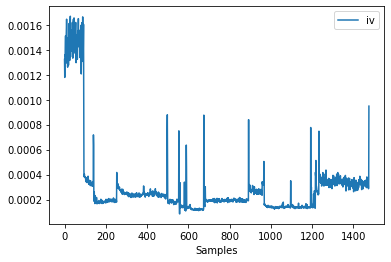

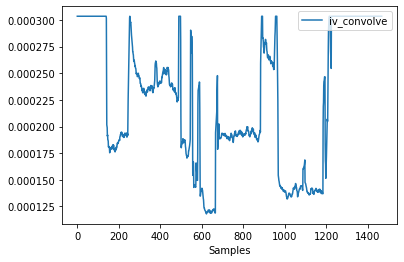

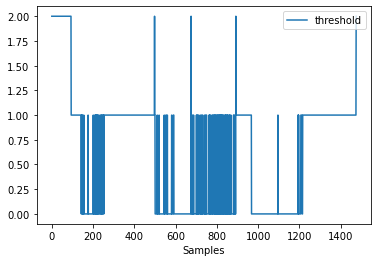

var:


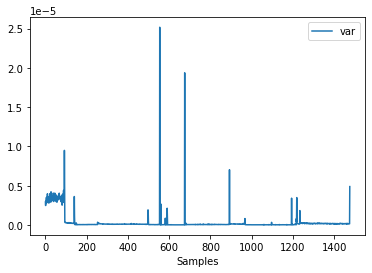

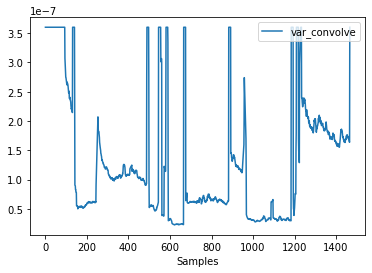

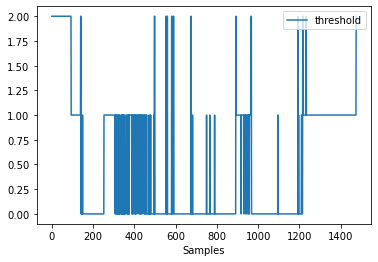

e:


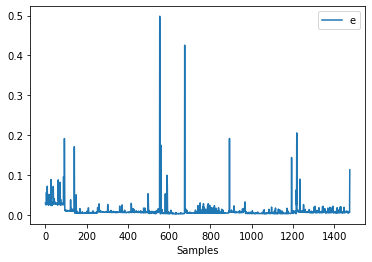

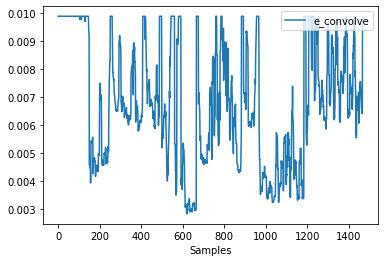

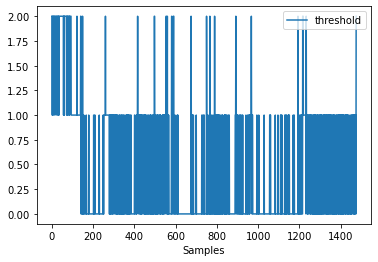

In [11]:
from struct import unpack
import numpy as np
import pandas as pd
import scipy
from scipy.signal import butter, sosfiltfilt, find_peaks
import time
import math
import matplotlib.pyplot as plt

%matplotlib inline

SAMPLE_RATE=500
RESAMPLE_RATE = 500
epoche_seconds = 10
lowcut = 12
highcut=40

def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    low = lowcut
    high = highcut
    sos = butter(order, [low, high], btype='bandpass', output="sos", fs=fs)
    y = sosfiltfilt(sos, data)
    return y

def remove_peaks(d, h):
    '''
    while(True):
        p, _ = find_peaks(d, height=h)
        #print(p)
        if(not len(p)):
            break
        
        for v in p:
            d[v] = h * 0.99
      '''      
    #
    #d = np.clip(d, -h, h)
    d = np.clip(d, 0, h)
    
    return d

def signal_plot(
    signal, sampling_rate=None, subplots=False, standardize=False, labels=None, **kwargs
):
    """Plot signal with events as vertical lines.
    Parameters
    ----------
    signal : array or DataFrame
        Signal array (can be a dataframe with many signals).
    sampling_rate : int
        The sampling frequency of the signal (in Hz, i.e., samples/second). Needs to be supplied if
        the data should be plotted over time in seconds. Otherwise the data is plotted over samples.
        Defaults to None.
    subplots : bool
        If True, each signal is plotted in a subplot.
    standardize : bool
        If True, all signals will have the same scale (useful for visualisation).
    labels : str or list
        Defaults to None.
    **kwargs : optional
        Arguments passed to matplotlib plotting.
    Examples
    ----------
    >>> import numpy as np
    >>> import pandas as pd
    >>> import neurokit2 as nk
    >>>
    >>> signal = nk.signal_simulate(duration=10, sampling_rate=1000)
    >>> nk.signal_plot(signal, sampling_rate=1000, color="red")
    >>>
    >>> data = pd.DataFrame({"Signal2": np.cos(np.linspace(start=0, stop=20, num=1000)),
    ...                      "Signal3": np.sin(np.linspace(start=0, stop=20, num=1000)),
    ...                      "Signal4": nk.signal_binarize(np.cos(np.linspace(start=0, stop=40, num=1000)))})
    >>> nk.signal_plot(data, labels=['signal_1', 'signal_2', 'signal_3'], subplots=True)
    >>> nk.signal_plot([signal, data], standardize=True)
    """
    # Sanitize format
    if isinstance(signal, list):
        try:
            for i in signal:
                len(i)
        except TypeError:
            signal = np.array(signal)

    if isinstance(signal, pd.DataFrame) is False:

        # If list is passed
        if isinstance(signal, list) or len(np.array(signal).shape) > 1:
            out = pd.DataFrame()
            for i, content in enumerate(signal):
                if isinstance(content, (pd.DataFrame, pd.Series)):
                    out = pd.concat([out, content], axis=1, sort=True)
                else:
                    out = pd.concat(
                        [out, pd.DataFrame({"Signal" + str(i + 1): content})],
                        axis=1,
                        sort=True,
                    )
            signal = out

        # If vector is passed
        else:
            signal = pd.DataFrame({"Signal": signal})

    # Copy signal
    signal = signal.copy()

    # Guess continuous and events columns
    continuous_columns = list(signal.columns.values)
    events_columns = []
    for col in signal.columns:
        vector = signal[col]
        if vector.nunique() == 2:
            indices = np.where(vector == np.max(vector.unique()))
            if bool(np.any(np.diff(indices) == 1)) is False:
                events_columns.append(col)
                continuous_columns.remove(col)

    # Adjust for sampling rate
    if sampling_rate is not None:
        signal.index = signal.index / sampling_rate
        title_x = "Time (seconds)"
    else:
        title_x = "Time"
    #        x_axis = np.linspace(0, signal.shape[0] / sampling_rate, signal.shape[0])
    #        x_axis = pd.DataFrame(x_axis, columns=["Time (s)"])
    #        signal = pd.concat([signal, x_axis], axis=1)
    #        signal = signal.set_index("Time (s)")

    # Plot accordingly
    if len(events_columns) > 0:
        events = []
        for col in events_columns:
            vector = signal[col]
            events.append(np.where(vector == np.max(vector.unique()))[0])
        plot = events_plot(events, signal=signal[continuous_columns])

        if sampling_rate is None and signal.index.is_integer():
            plot.gca().set_xlabel("Samples")
        else:
            plot.gca().set_xlabel(title_x)

    else:

        # Aesthetics
        colors = [
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
            "#9467bd",
            "#8c564b",
            "#e377c2",
            "#7f7f7f",
            "#bcbd22",
            "#17becf",
        ]
        if len(continuous_columns) > len(colors):
            colors = plt.cm.viridis(np.linspace(0, 1, len(continuous_columns)))

        # Plot
        if standardize is True:
            signal[continuous_columns] = nk_standardize(signal[continuous_columns])

        if subplots is True:
            fig, axes = plt.subplots(
                nrows=len(continuous_columns), ncols=1, sharex=True, **kwargs
            )
            for ax, col, color in zip(axes, continuous_columns, colors):
                ax.plot(signal[col], c=color, **kwargs)
        else:
            plot = signal[continuous_columns].plot(
                subplots=False, sharex=True, **kwargs
            )

        if sampling_rate is None and signal.index.is_integer():
            plt.xlabel("Samples")
        else:
            plt.xlabel(title_x)

    # Tidy legend locations and add labels
    if labels is None:
        labels = continuous_columns.copy()

    if isinstance(labels, str):
        n_labels = len([labels])
        labels = [labels]
    elif isinstance(labels, list):
        n_labels = len(labels)

    if len(signal[continuous_columns].columns) != n_labels:
        raise ValueError(
            "NeuroKit error: signal_plot(): number of labels does not equal the number of plotted signals."
        )

    if subplots is False:
        plt.legend(labels, loc=1)
    else:
        for i, label in enumerate(labels):
            axes[i].legend([label], loc=1)

features = {
    'iv': [],
    'var': [],
    'e': []
}

with open('out.dat', 'rb') as f:
    #d = f.read(16)
    #if d:
    if True:
        #for i in range(150):
        i = 0
        while True:
            d = f.read(epoche_seconds*SAMPLE_RATE*2)
            if not d:
                break
                
            print('epoche#{}'.format(i))

            fmt = '<{}H'.format(len(d) // 2)
            t = unpack(fmt, d)
            d = list(t)
            d = np.array(d)
            
            '''
            df=pd.DataFrame({'signal': d})
            signal_plot(df)
            plt.show()
            '''
            
            d = d / (1 << 14)#(np.amax(d)*2)
        
            # РїРѕРґРіРѕС‚РѕРІРєР° СЃРёРіРЅР°Р»Р°:
            d = butter_bandpass_filter(d, lowcut, highcut, SAMPLE_RATE, order=2)
            '''
            df=pd.DataFrame({'signal': d})
            signal_plot(df)
            plt.show()
            '''

            # РёР·РІР»РµРєР°РµРј С„РёС€РєРё (С…Р°СЂР°РєС‚РµСЂРёСЃС‚РёРєРё) СЃРёРіРЅР°Р»Р°:
            future_iv = np.mean(np.absolute(d))
            #print('iv={}'.format(future_iv))
            future_var = np.var(d)
            #print('var={}'.format(future_var))
            
            ws = 6
            df = pd.DataFrame({'signal': np.absolute(d)})
            future_e = df.rolling(ws).sum()[ws-1:].max().signal
            #print('E={}'.format(future_e))

            # РЅРѕСЂРјР°Р»РёР·СѓРЅРµРј С„РёС€РєРё:
            features['iv'].append(future_iv)
            features['var'].append(future_var)
            features['e'].append(future_e)
            
            i += 1

        '''
        df=pd.DataFrame({
            'e': features['e']
        })
        signal_plot(df)
        plt.show()
        
        df=pd.DataFrame({
            'iv': features['iv']
        })
        signal_plot(df)
        plt.show()
        
        df=pd.DataFrame({
            'var': features['var']
        })
        signal_plot(df)
        plt.show()
        '''
        for k, v in features.items():
            print('{}:'.format(k))
            df=pd.DataFrame({
                k: v
            })
            signal_plot(df)
            plt.show()

            # вычисляем пороги:
            # фильтруем фишки вычисляя скользящие средние:
            NC = 10
            nff = np.convolve(v, np.ones(NC)/NC, mode='valid')
            mean = nff.mean()
            std = math.sqrt(nff.var())
            
            nff = remove_peaks(nff, mean)
            nff = remove_peaks(nff, std)

            df=pd.DataFrame({
                k + '_convolve': nff
            })
            signal_plot(df)
            plt.show()
            
            
            # оставшиеся пики:
            peaks_m, _ = find_peaks(nff, height=0)
            if len(peaks_m):
                mp_m = np.array([nff[v] for v in peaks_m]).mean()
                st_m = 4 * mp_m
                wt_m = mp_m
                #print(f'st_m: {st_m}; wt_m: {wt_m}')

            peaks_v, _ = find_peaks(nff, height=0)
            if len(peaks_v):
                mp_v = np.array([nff[v] for v in peaks_v]).mean()
                st_v = 4 * mp_v
                wt_v = mp_v
                #print(f'st_v: {st_v}; wt_v: {wt_v}')

            #print(peaks_m)
            #print(peaks_v)

            t = []
            nf = v
            for v in nf:
                if v > st_v:
                    t.append(2)
                else:
                    if v > wt_v:
                        t.append(1)
                    else:
                        t.append(0)

            df=pd.DataFrame({
                'threshold': t
            })
            signal_plot(df)
            plt.show()